<a href="https://colab.research.google.com/github/deepika2345/torch_math/blob/main/neural_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #it is a deep learning open source framework
import torch.nn as nn #it contains pre defined layers
import torch.nn.functional as F # provides functions for various operations e.g:activation ,loss,..functions

In [ ]:
class Model(nn.Module):
  #4 features(i/p layer)
  # 2 hidden layers
  # 3 classes for o/p layer
  def __init__(self,in_features=4,h1=8,h2=10,out_features=3):#it is for initilizing the objects
    """

    self: This is a reference to the instance of the class itself. It is always the first parameter of instance methods in a class.
    """
    super().__init__() #instance for nn modle calling parent model and initiating properly
    """
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
    """
    # Change the following line in ipython-input-186-24ed87016160:
    # self.fc1=nn.Linear(in_features,h1)
    self.fc1=nn.Linear(in_features=in_features,out_features=h1)

    # Change the following line in ipython-input-186-24ed87016160:
    # self.fc2=nn.Linear(h1,h2)
    self.fc2=nn.Linear(in_features=h1,out_features=h2)

    # Change the following line in ipython-input-186-24ed87016160:
    # self.out=nn.Linear(h2,out_features)
    self.out=nn.Linear(in_features=h2,out_features=out_features)

  def forward(self,x):
    """
    In the context of a neural network class in PyTorch, the forward method defines how the input data flows through the layers of the network.
    This method is where you specify the operations that transform the input tensor into the output tensor.
     When you create a custom neural network class,
      you inherit from torch.nn.Module and override the forward method to define the computation performed at every call.
    """
    x=F.relu(self.fc1(x))
    """
    The F.relu function applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.
    This helps the model learn more complex patterns.
    """
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x






In [ ]:
torch.manual_seed(2)
"""
torch.manual_seed(41) sets the seed for all random number generators in PyTorch to 41.
 This makes sure that the random numbers (like initial weights) are the same every time you run the script.
"""
model=Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_ds=pd.read_csv(url)

In [ ]:
my_ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_ds['species']=my_ds['species'].replace('setosa',0.0)
my_ds['species']=my_ds['species'].replace('versicolor',1.0)
my_ds['species']=my_ds['species'].replace('virginica',2.0)
my_ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#split feartures and output
X=my_ds.drop('species',axis=1)
Y=my_ds['species']

In [ ]:
#convert to numpy arrays
X=X.values
Y=Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [ ]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

In [ ]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
#set criterion to measure error(prediction is diff from original)
criterion=nn.CrossEntropyLoss()
#choose optimizer set learning rate
#if learning rate is less it will take that much time to learn
#so performance increases
#lr learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [ ]:
#train model
#Epochs one run through out all the training data in our network
epochs=300
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  #measure error/loss
  loss=criterion(y_pred,y_train)
  #track losses
  losses.append(loss.detach().numpy())
  if i%30==0:
    print(f'{i}  {loss}')

  #Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0  1.1240748167037964
30  0.4414001703262329
60  0.12748388946056366
90  0.06770772486925125
120  0.0596124567091465
150  0.056263815611600876
180  0.053977563977241516
210  0.05217335745692253
240  0.050677236169576645
270  0.04940915107727051


Text(0.5, 0, 'epoch')

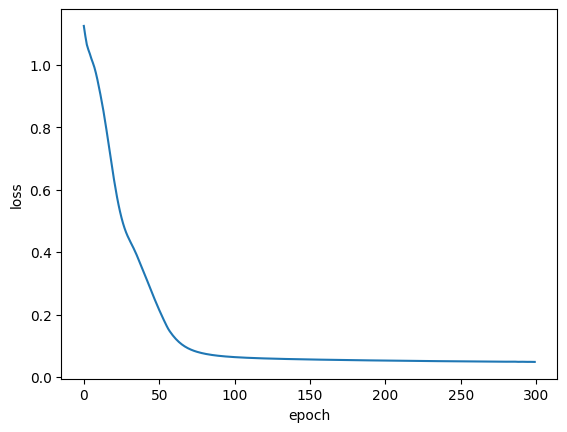

In [ ]:
#Graph
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel('epoch')

In [ ]:
#evaluate model on test data
with torch.no_grad(): #to stop back propagation we don't need it while testing
   y_eval=model.forward(x_test)
   loss=criterion(y_eval,y_test)



In [ ]:
loss

tensor(0.0239)

In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val=model.forward(data)
    # print(f'{i+1} {str(y_val)}\t{y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(correct)

30


In [ ]:
new_iris=torch.tensor([4.5,7.9,2.3,9.0])
# Ensure the input is of the correct shape
#new_iris = new_iris.view(1, -1)  # Reshape to (1, 4)


In [ ]:
with torch.no_grad():
  #model=Model()
  flower_name=model(new_iris)
   # Get the predicted class
  predicted_class = torch.argmax(flower_name, dim=-1).item()

  print(predicted_class)  # Print the predicted class (0, 1, or 2)

2


In [ ]:
#save and load model
torch.save(model.state_dict(),'iris_model.pt')

In [ ]:
#load the save model
new_model=Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)